# Plotting with Matplotlib

Credits to Ben Root and the [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib) tutorial on which parts of this document are based.

## Introduction
Matplotlib (mpl) is a library for producing publication-quality figures<br>
while enabling interactive, cross-platform control over how we plot our data and with what appearance.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).

### Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! This is why the [gallery](http://matplotlib.org/gallery.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

In [2]:
from IPython.display import IFrame

IFrame(
    "https://matplotlib.org/stable/gallery/index",
    width="100%",
    height=400,
)

<br>
<br>

# Anatomy of a "Plot"
<center>
    <img src="images/plot_anatomy.png" alt="centered image" width="60%"/>
</center>

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes`` / ``Subplots``. 

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual ``Axis`` part of things all that much.  However, it is worth mentioning here to explain where the term ``Axes`` comes from.

<br>

## Getting Started

In [3]:
from matplotlib import pyplot as plt

#### creating a figure

In [5]:
fig = plt.figure()
fig

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

But nothing is happening ... <br>
Thats because notebooks will not show empty figures.<br> 
If we were to run a normal python script instead, we would have to call
```python
plt.show()
```
which would then show as an empty figure
<center>
    <img src="images/empty_figure.png" alt="centered image" width="50%"/>
</center>

*So let's add some things to our figure!*

---
## Axes / Subplots

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

To sep up a `Figure` together with `Axes` we have to options.
<br>
<br>

#### Option 1:
creating a figure with `plt.figure()`<br>
adding a subplot/axes to the figure with `fig.add_suplot(111)`


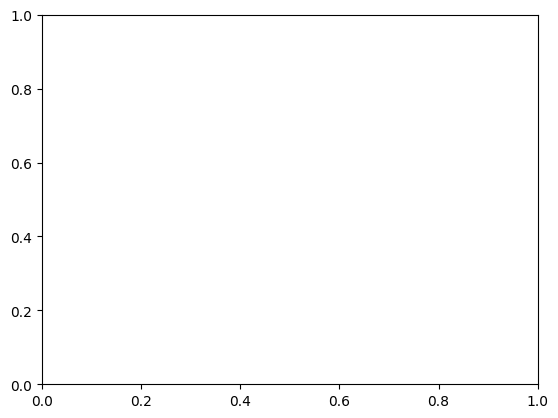

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

The `111` indicates that in a `1` by `1` grid of subplots we place the subplot in the `1`st slot.

So for `24X` we could do the following

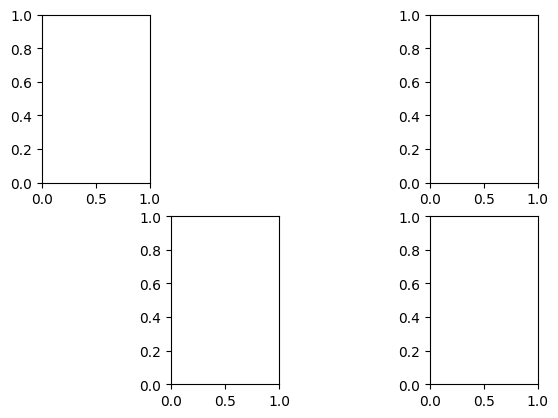

In [9]:
fig = plt.figure()
_ = fig.add_subplot(241)
_ = fig.add_subplot(244)
_ = fig.add_subplot(246)
_ = fig.add_subplot(248)

#### Option 2 (better imo)
It can be argued that the syntax of option 1 is not that covenient especially for when we want to have multiple subplots,<br> 
since we have to add each of them one by one.<br>

So instead we can use:

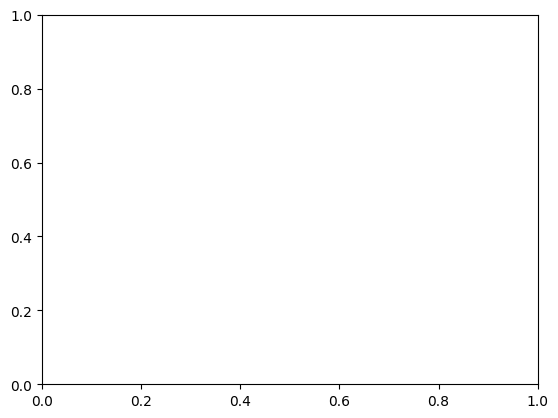

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)

`plt.subplots` returns us both a figure and an array of axes/subplots.

If we want to created multiple subplots:

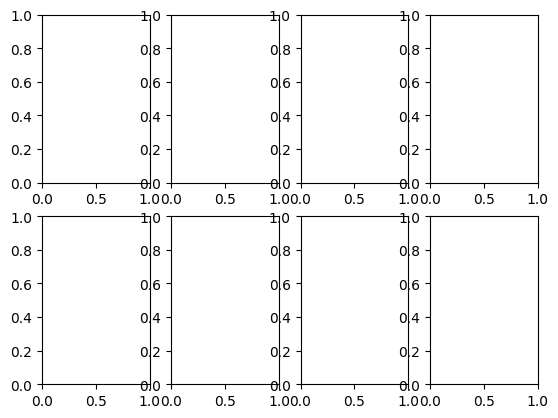

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 4)

### Improving appearance with `fig.tight_layout()` and `figsize`
Right now the figure is very small and also the axis tick labels are overlapping. <br>
To fix that we can call `fig.tight_layout()`

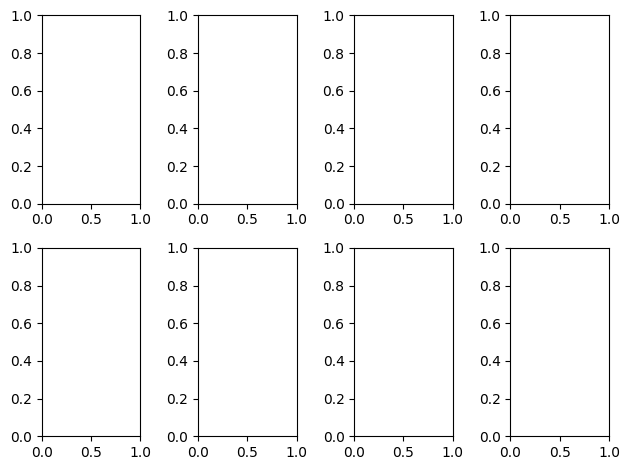

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 4)
fig.tight_layout()

And also change change the figure size with the parameter `figsize`

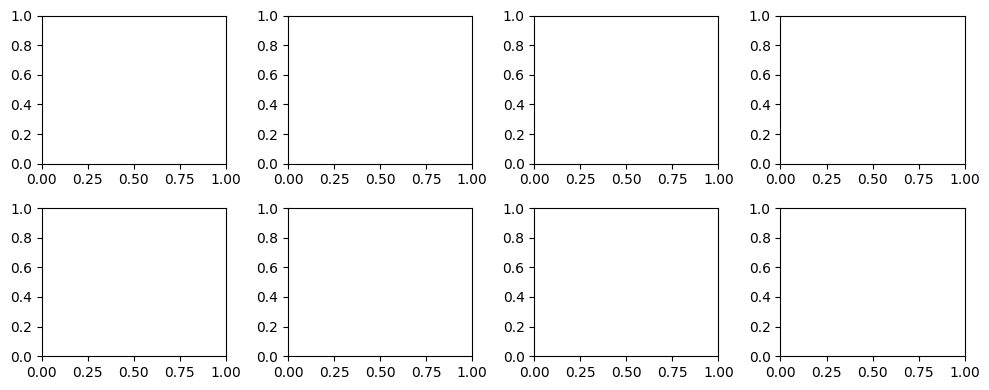

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize=(10, 4))
fig.tight_layout()

<br>

### `set`ting up our subplot

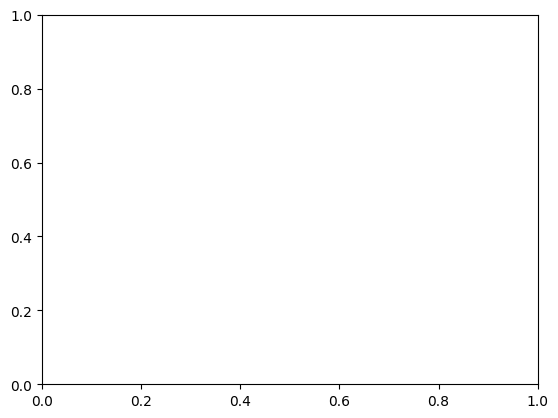

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

So lets `set`up some things

In [22]:
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title("An Example Axes")
ax.set_ylabel("Y-Axis")
ax.set_xlabel("X-Axis")

Text(0.5, 4.444444444444445, 'X-Axis')

In jupyter notebook we can show our figure just by writting its variable:

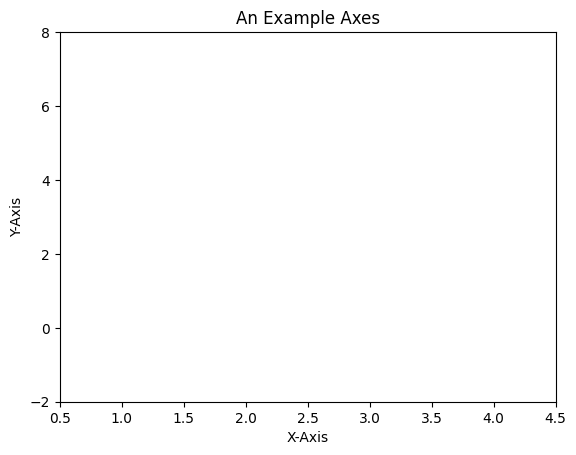

In [24]:
fig

### the same thing but shorter
Calling `set_<something>` can become very repetitive, so instead we can just call `set` and pass the different setters as kwargs.<br>
For example, `ax.set(foo='bar')` would call `ax.set_foo('bar')`.

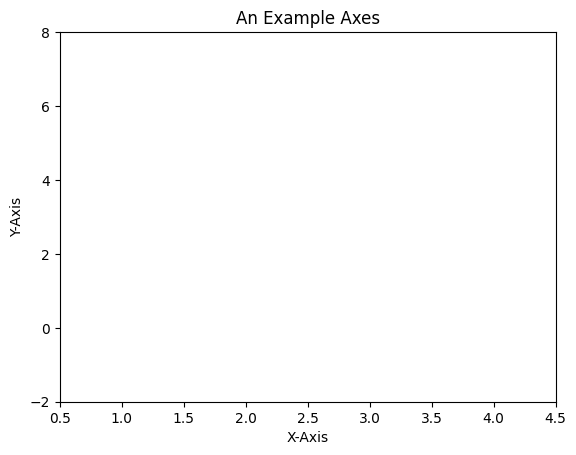

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

# the _ captures return values that we dont want to have displayed by jupyter
_ = ax.set(
    xlim=[0.5, 4.5], 
    ylim=[-2, 8], 
    title='An Example Axes',
    ylabel='Y-Axis', 
    xlabel='X-Axis',
)

<br>

---

## Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

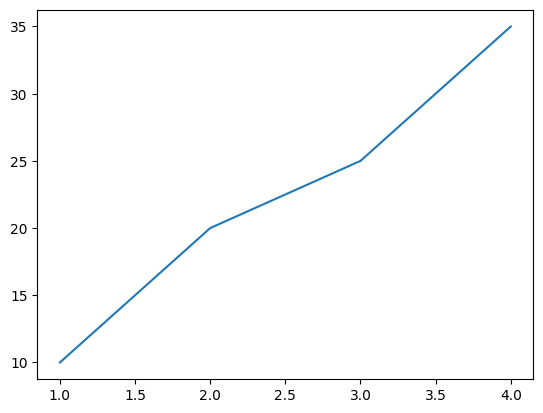

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot([1, 2, 3, 4], [10, 20, 25, 35])

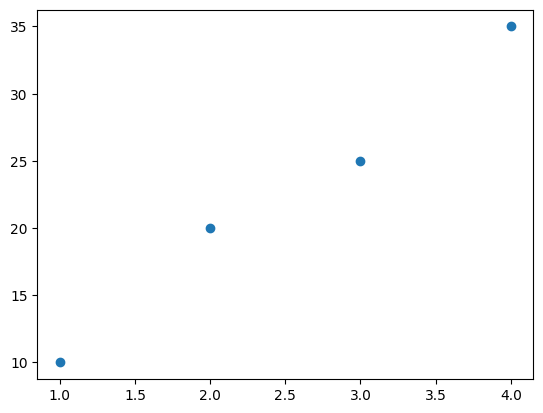

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.scatter([1, 2, 3, 4], [10, 20, 25, 35])

Multiple calls to the plot function will result in multiple plots. <br>
This works with many functions in mpl (plot, scatter, bar, etc.) and assigns different colors to the different calls.

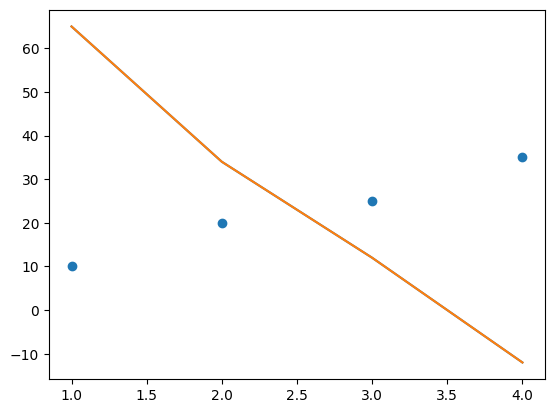

In [32]:
ax.plot([1, 2, 3, 4], [65, 34, 12, -12])
fig

<br>

## Multiple Axes
We already created figures with mutliple axes/suplots. 

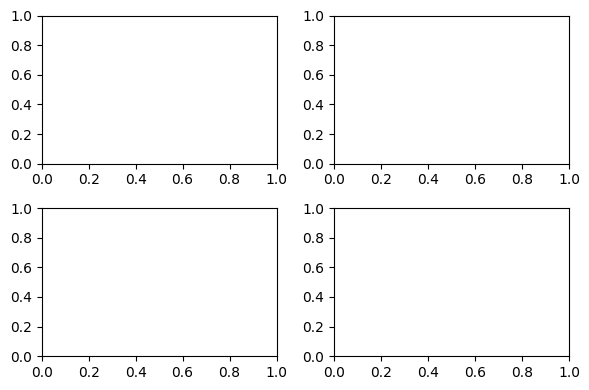

In [34]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(6,4))
fig.tight_layout()

The axes that are returned come as as an array 

In [36]:
print(type(axes))
print(type(axes[0,0]))

<class 'numpy.ndarray'>
<class 'matplotlib.axes._axes.Axes'>


So so change the individual axes we index the array and then call the usual methods

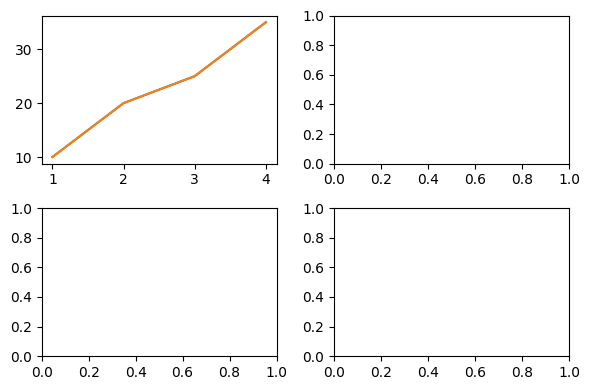

In [38]:
axes[0,0].plot([1, 2, 3, 4], [10, 20, 25, 35])
fig

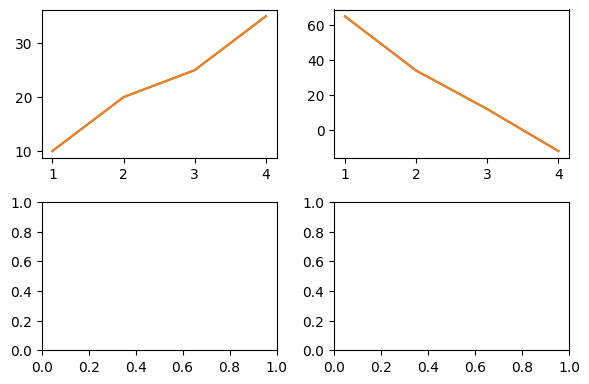

In [40]:
axes[0,1].plot([1, 2, 3, 4], [65, 34, 12, -12])
fig

### setting `title` and a `suptitle`
As we have seen before we can set titles and subtitles to our axes.

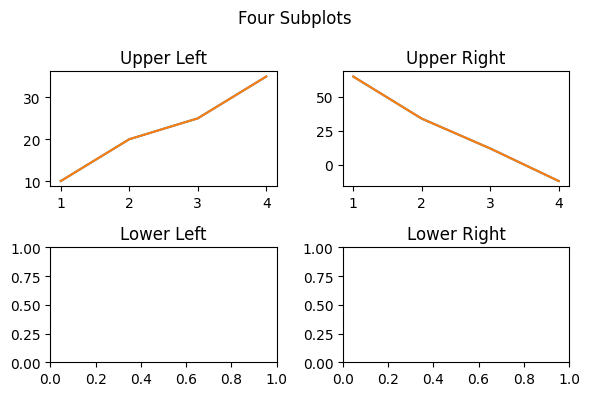

In [42]:
axes[0, 0].set(title="Upper Left")
axes[0, 1].set(title="Upper Right")
axes[1, 0].set(title="Lower Left")
axes[1, 1].set(title="Lower Right")
fig.suptitle("Four Subplots")
fig.tight_layout()
fig

## Axes methods (object oriented interface) vs. pyplot (state machine interface)

Interestingly, just about all methods of an `Axes` object exist as a function in the `pyplot` module (and vice-versa). <br>
For example, when calling `plt.xlim(1, 10)`, `pyplot` calls `ax.set_xlim(1, 10)` on whichever `Axes` is *current*. <br>
Here is an equivalent version of the above example using just `pyplot`.

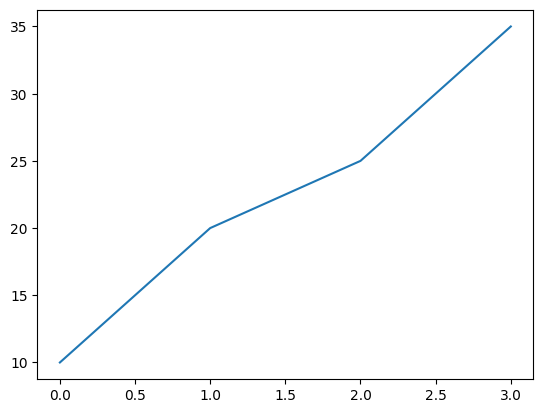

In [44]:
plt.figure()
plt.plot([10, 20, 25, 35])
plt.show()

Much cleaner, and much clearer! So, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) -  "The Zen of Python" says:

"Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.